In [56]:
import numpy as np
import numpy.random as nr
import random
#import itertools
import scipy.misc

import matplotlib
import matplotlib.pyplot as plt
from scipy.special import logsumexp

#%matplotlib notebook
#%matplotlib qt 
%matplotlib inline 
import time
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})


from grid_world_new import grid_world
from q_agent_class import Qagent

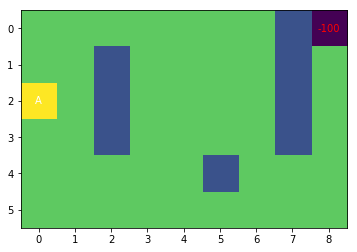

In [65]:
walls = np.array([[0,0,0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0,0,0],
                ])


walls = np.array([[0,0,0,0,0,0,0,1,0],
                 [0,0,1,0,0,0,0,1,0],
                 [0,0,1,0,0,0,0,1,0],
                 [0,0,1,0,0,0,0,1,0],
                 [0,0,0,0,0,1,0,0,0],
                 [0,0,0,0,0,0,0,0,0],
                ])




rewards = np.array(
                [[0,0,0,0,0,0,0,0, -100],
                 [0,0,0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0,0,0],
                ])

start_state = np.array([2,0])

transition_noise = 0

gw = grid_world(rewards, walls, start_state, transition_noise)
f,(ax1) = plt.subplots(1) # plot environment
gw.render(ax1)
plt.show()

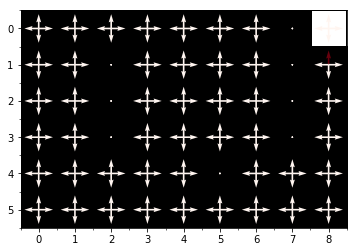

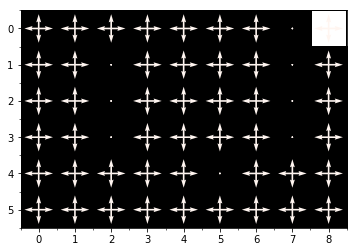

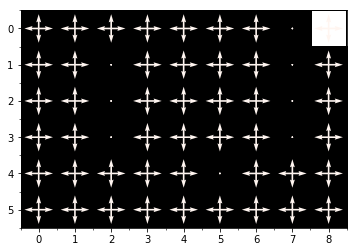

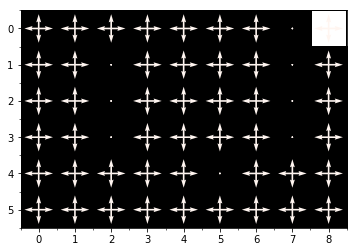

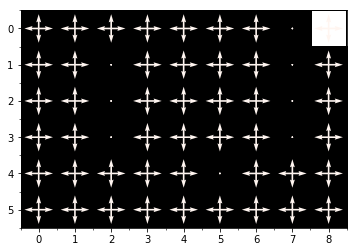

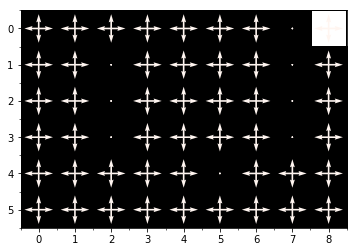

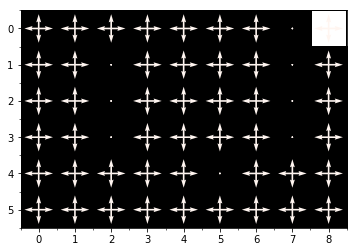

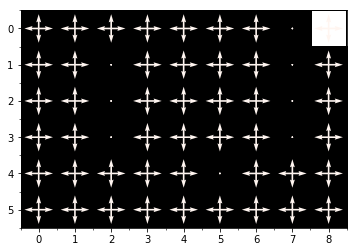

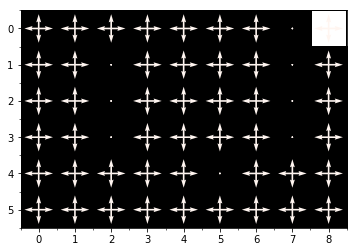

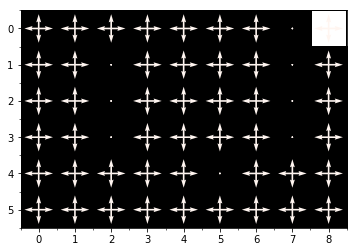

In [66]:
Tsas = gw.make_Tsas()
Rsa = gw.Rsa

# make a Q agent starting with these
params = {'beta': 50, 'alpha_q': 1, 'gamma': .9}
n_states = int(np.size(walls))


qag = Qagent(params, n_states, Tsas = Tsas, Rsa = Rsa, grid = True, wall_mtx = walls)

for j in range(4):
    qag.backup_Q(8,j,reset = True)


# store gain of past choices
n_runs = 10

gain_store = np.zeros([Rsa.shape[0], Rsa.shape[1], n_runs])
Qsa_store = np.zeros([Rsa.shape[0], Rsa.shape[1], n_runs])
V_store = np.zeros([gw.n_states, n_runs])


for i in range(n_runs):
    # pre-backup gain
    V = np.max(qag.Q_hat,axis = 1)
    gain = qag.comp_gain(which_Q_new = 'full')
    winner = np.nonzero(gain == np.amax(gain))
    new_gain = np.zeros(gain.shape)
    new_gain[winner] = 1
    f,(ax1) = plt.subplots(1) # plot environment
    gw.render_vec(V,ax1)
    gw.render_sa_mtx(new_gain,ax1, over_im = True)
    plt.show()
    
    gain_store[:,:,i] = gain
    Qsa_store[:,:,i] = qag.Q_hat
    V_store[:,i] = V
    
    # update 
    (s,a) = np.unravel_index(np.argmax(gain, axis=None), gain.shape)
    qag.backup_Q(s,a,reset=True)

#for i in range(7):
    # get max backup
#    (s,a) = np.unravel_index(np.argmax(gain, axis=None), gain.shape)
    # apply backup
#    qag.backup_Q(s,a,reset=True)

    # compute gain and state values
#    gain = qag.comp_gain()
#    winner = np.nonzero(gain == np.amax(gain))
#    new_gain = np.zeros(gain.shape)
#    new_gain[winner] = 1
#    V = np.max(qag.Q_hat,axis = 1)
    #f,(ax1) = plt.subplots(1) # plot environment

    #gw.render_vec(V,ax1)
    #gw.render_sa_mtx(new_gain,ax1, over_im = True)

    #plt.show() # it's in the wrong place



In [ ]:
r = 0
print(np.reshape(gain_store[:,0,r], walls.shape))
print(np.reshape(gain_store[:,1,r], walls.shape))
print(np.reshape(gain_store[:,2,r], walls.shape))
print(np.reshape(gain_store[:,3,r], walls.shape))

In [ ]:
gw.state_mtx

In [ ]:
Qsa_store[17,:,3]
qnew = np.array([-4062.50, -312.50, -312.50, 0.00])

log_cp = qag.params['beta']*qnew - logsumexp(qag.params['beta']*qnew)
real_choice_probs = np.exp(log_cp)
real_choice_probs

In [ ]:
pi = qag.comp_pi(Qsa_store[:,:,0])
print(pi[17,:])
pi = qag.comp_pi(Qsa_store[:,:,1])
print(pi[17,:])
pi = qag.comp_pi(Qsa_store[:,:,2])
print(pi[17,:])
pi = qag.comp_pi(Qsa_store[:,:,3])
print(pi[17,:])

In [ ]:
print(gain_store[17,:,0])
print(gain_store[17,:,1])
print(gain_store[17,:,2])
print(gain_store[17,:,3])


In [70]:
walls = np.array([[0,0,0,0,0,0,0,1,0],
                 [0,0,1,0,0,0,0,1,0],
                 [0,0,1,0,0,0,0,1,0],
                 [0,0,1,0,0,0,0,1,0],
                 [0,0,0,0,0,1,0,0,0],
                 [0,0,0,0,0,0,0,0,0],
                ])




rewards = np.array(
                [[0,0,0,0,0,0,0,0, -5000],
                 [0,0,0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0,0,0],
                ])

start_state = np.array([2,0])

transition_noise = .25

gw = grid_world(rewards, walls, start_state, transition_noise)
Tsas = gw.make_Tsas()
Rsa = gw.Rsa

# make a Q agent starting with these
params = {'beta': 50, 'alpha_q': 1, 'gamma': .9}
n_states = int(np.size(walls))


qag = Qagent(params, n_states, Tsas = Tsas, Rsa = Rsa, grid = True, wall_mtx = walls)

for j in range(4):
    qag.backup_Q(8,j,reset = True)


names = ['up', 'down', 'left', 'right']
    
# no backups
## now look at state 17,0
s = 17
for a in range(4):
    print('\n\n a:', a, ' ', names[a])
    Q_pre = qag.Q_hat
    print('Q_pre', Q_pre[s,:])
    pi_pre = qag.comp_pi(Q_pre)
    print('pi_pre',  pi_pre[s,:])
    pi_pre_loc = pi_pre[s,:]
    post_Q_hat_ss = qag.backup_Q(17,a, Q_hat = Q_pre, reset = False)
    print('Qpost',post_Q_hat_ss[s,:])
    pi_post = qag.comp_pi(post_Q_hat_ss)
    print('pi_post',pi_post[s,:])
    Q_post_full = qag.evaluate_policy(pi_post,type = 'Q')
    print('Qpost_full',Q_post_full[s,:])
    gain_ss = np.dot((pi_post[s,:] - pi_pre[s,:]),post_Q_hat_ss[s,:])
    print('gain_ss:', gain_ss)
    gain_full = np.dot((pi_post[s,:] - pi_pre[s,:]),Q_post_full[s,:])
    print('gain_full:', gain_full)

print('\n \n backing up action 0, up \n')
qag.backup_Q(s,0)

for a in range(4):
    print('\n\n a:', a, ' ', names[a])
    Q_pre = qag.Q_hat
    print('Q_pre', Q_pre[s,:])
    pi_pre = qag.comp_pi(Q_pre)
    print('pi_pre',  pi_pre[s,:])
    pi_pre_loc = pi_pre[s,:]
    post_Q_hat_ss = qag.backup_Q(17,a, Q_hat = Q_pre, reset = False)
    print('Qpost',post_Q_hat_ss[s,:])
    pi_post = qag.comp_pi(post_Q_hat_ss)
    print('pi_post',pi_post[s,:])
    Q_post_full = qag.evaluate_policy(pi_post,type = 'Q')
    print('Qpost_full',Q_post_full[s,:])
    gain_ss = np.dot((pi_post[s,:] - pi_pre[s,:]),post_Q_hat_ss[s,:])
    print('gain_ss:', gain_ss)
    gain_full = np.dot((pi_post[s,:] - pi_pre[s,:]),Q_post_full[s,:])
    print('gain_full:', gain_full)
    

qag.backup_Q(s,2)
print('\n \n backing up action 2, left \n')

for a in range(4):
    print('\n\n a:', a, ' ', names[a])
    Q_pre = qag.Q_hat
    print('Q_pre', Q_pre[s,:])
    pi_pre = qag.comp_pi(Q_pre)
    print('pi_pre',  pi_pre[s,:])
    pi_pre_loc = pi_pre[s,:]
    post_Q_hat_ss = qag.backup_Q(17,a, Q_hat = Q_pre, reset = False)
    print('Qpost',post_Q_hat_ss[s,:])
    pi_post = qag.comp_pi(post_Q_hat_ss)
    print('pi_post',pi_post[s,:])
    Q_post_full = qag.evaluate_policy(pi_post,type = 'Q')
    print('Qpost_full',Q_post_full[s,:])
    gain_ss = np.dot((pi_post[s,:] - pi_pre[s,:]),post_Q_hat_ss[s,:])
    print('gain_ss:', gain_ss)
    gain_full = np.dot((pi_post[s,:] - pi_pre[s,:]),Q_post_full[s,:])
    print('gain_full:', gain_full)


qag.backup_Q(s,3)
print('\n \n backing up action 3, right \n')

for a in range(4):
    print('\n\n a:', a, ' ', names[a])
    Q_pre = qag.Q_hat
    print('Q_pre', Q_pre[s,:])
    pi_pre = qag.comp_pi(Q_pre)
    print('pi_pre',  pi_pre[s,:])
    pi_pre_loc = pi_pre[s,:]
    post_Q_hat_ss = qag.backup_Q(17,a, Q_hat = Q_pre, reset = False)
    print('Qpost',post_Q_hat_ss[s,:])
    pi_post = qag.comp_pi(post_Q_hat_ss)
    print('pi_post',pi_post[s,:])
    Q_post_full = qag.evaluate_policy(pi_post,type = 'Q')
    print('Qpost_full',Q_post_full[s,:])
    gain_ss = np.dot((pi_post[s,:] - pi_pre[s,:]),post_Q_hat_ss[s,:])
    print('gain_ss:', gain_ss)
    gain_full = np.dot((pi_post[s,:] - pi_pre[s,:]),Q_post_full[s,:])
    print('gain_full:', gain_full)





 a: 0   up
Q_pre [0.00 0.00 0.00 0.00]
pi_pre [0.25 0.25 0.25 0.25]
Qpost [-3656.25 0.00 0.00 0.00]
pi_post [0.00 0.33 0.33 0.33]
Qpost_full [-3791.71 -747.86 -1063.51 -1063.51]
gain_ss: 914.0625
gain_full: 708.3552916413688


 a: 1   down
Q_pre [0.00 0.00 0.00 0.00]
pi_pre [0.25 0.25 0.25 0.25]
Qpost [0.00 -281.25 0.00 0.00]
pi_post [0.33 0.00 0.33 0.33]
Qpost_full [-4142.66 -1956.71 -3090.14 -3090.14]
gain_ss: 70.3125
gain_full: -371.0659393028307


 a: 2   left
Q_pre [0.00 0.00 0.00 0.00]
pi_pre [0.25 0.25 0.25 0.25]
Qpost [0.00 0.00 -281.25 0.00]
pi_post [0.33 0.33 0.00 0.33]
Qpost_full [-4039.65 -1601.90 -2495.30 -2495.30]
gain_ss: 70.3125
gain_full: -54.245692370396455


 a: 3   right
Q_pre [0.00 0.00 0.00 0.00]
pi_pre [0.25 0.25 0.25 0.25]
Qpost [0.00 0.00 0.00 -281.25]
pi_post [0.33 0.33 0.33 0.00]
Qpost_full [-4039.65 -1601.90 -2495.30 -2495.30]
gain_ss: 70.3125
gain_full: -54.245692370396455

 
 backing up action 0, up 



 a: 0   up
Q_pre [-3656.25 0.00 0.00 0.00]
pi_pre [

In [69]:
walls = np.array([[0,0,0,0,0,0,0,1,0],
                 [0,0,1,0,0,0,0,1,0],
                 [0,0,1,0,0,0,0,1,0],
                 [0,0,1,0,0,0,0,1,0],
                 [0,0,0,0,0,1,0,0,0],
                 [0,0,0,0,0,0,0,0,0],
                ])




rewards = np.array(
                [[0,0,0,0,0,0,0,0, -5000],
                 [0,0,0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0,0,0],
                ])

start_state = np.array([2,0])

transition_noise = .25

gw = grid_world(rewards, walls, start_state, transition_noise)
Tsas = gw.make_Tsas()
Rsa = gw.Rsa

# make a Q agent starting with these
params = {'beta': 50, 'alpha_q': 1, 'gamma': .9}
n_states = int(np.size(walls))


qag = Qagent(params, n_states, Tsas = Tsas, Rsa = Rsa, grid = True, wall_mtx = walls)

for j in range(4):
    qag.backup_Q(8,j,reset = True)


names = ['up', 'down', 'left', 'right']
    
# no backups
## now look at state 17,0
s = 17
for a in range(4):
    print('\n\n a:', a, ' ', names[a])
    Q_pre = qag.Q_hat
    print('Q_pre', Q_pre[s,:])
    pi_pre = qag.comp_pi(Q_pre)
    print('pi_pre',  pi_pre[s,:])
    pi_pre_loc = pi_pre[s,:]
    post_Q_hat_ss = qag.backup_Q(17,a, Q_hat = Q_pre, reset = False)
    print('Qpost',post_Q_hat_ss[s,:])
    pi_post = qag.comp_pi(post_Q_hat_ss)
    print('pi_post',pi_post[s,:])
    Q_post_full = qag.evaluate_policy(pi_post,type = 'Q')
    print('Qpost_full',Q_post_full[s,:])
    gain_ss = np.dot((pi_post[s,:] - pi_pre[s,:]),post_Q_hat_ss[s,:])
    print('gain_ss:', gain_ss)
    gain_full = np.dot((pi_post[s,:] - pi_pre[s,:]),Q_post_full[s,:])
    print('gain_full:', gain_full)

print('\n \n backing up action 0, up \n')
qag.backup_Q(s,0)

for a in range(4):
    print('\n\n a:', a, ' ', names[a])
    Q_pre = qag.Q_hat
    print('Q_pre', Q_pre[s,:])
    pi_pre = qag.comp_pi(Q_pre)
    print('pi_pre',  pi_pre[s,:])
    pi_pre_loc = pi_pre[s,:]
    post_Q_hat_ss = qag.backup_Q(17,a, Q_hat = Q_pre, reset = False)
    print('Qpost',post_Q_hat_ss[s,:])
    pi_post = qag.comp_pi(post_Q_hat_ss)
    print('pi_post',pi_post[s,:])
    Q_post_full = qag.evaluate_policy(pi_post,type = 'Q')
    print('Qpost_full',Q_post_full[s,:])
    gain_ss = np.dot((pi_post[s,:] - pi_pre[s,:]),post_Q_hat_ss[s,:])
    print('gain_ss:', gain_ss)
    gain_full = np.dot((pi_post[s,:] - pi_pre[s,:]),Q_post_full[s,:])
    print('gain_full:', gain_full)
    

qag.backup_Q(s,1)
print('\n \n backing up action 1, down \n')

for a in range(4):
    print('\n\n a:', a, ' ', names[a])
    Q_pre = qag.Q_hat
    print('Q_pre', Q_pre[s,:])
    pi_pre = qag.comp_pi(Q_pre)
    print('pi_pre',  pi_pre[s,:])
    pi_pre_loc = pi_pre[s,:]
    post_Q_hat_ss = qag.backup_Q(17,a, Q_hat = Q_pre, reset = False)
    print('Qpost',post_Q_hat_ss[s,:])
    pi_post = qag.comp_pi(post_Q_hat_ss)
    print('pi_post',pi_post[s,:])
    Q_post_full = qag.evaluate_policy(pi_post,type = 'Q')
    print('Qpost_full',Q_post_full[s,:])
    gain_ss = np.dot((pi_post[s,:] - pi_pre[s,:]),post_Q_hat_ss[s,:])
    print('gain_ss:', gain_ss)
    gain_full = np.dot((pi_post[s,:] - pi_pre[s,:]),Q_post_full[s,:])
    print('gain_full:', gain_full)


qag.backup_Q(s,2)
print('\n \n backing up action 2, left \n')

for a in range(4):
    print('\n\n a:', a, ' ', names[a])
    Q_pre = qag.Q_hat
    print('Q_pre', Q_pre[s,:])
    pi_pre = qag.comp_pi(Q_pre)
    print('pi_pre',  pi_pre[s,:])
    pi_pre_loc = pi_pre[s,:]
    post_Q_hat_ss = qag.backup_Q(17,a, Q_hat = Q_pre, reset = False)
    print('Qpost',post_Q_hat_ss[s,:])
    pi_post = qag.comp_pi(post_Q_hat_ss)
    print('pi_post',pi_post[s,:])
    Q_post_full = qag.evaluate_policy(pi_post,type = 'Q')
    print('Qpost_full',Q_post_full[s,:])
    gain_ss = np.dot((pi_post[s,:] - pi_pre[s,:]),post_Q_hat_ss[s,:])
    print('gain_ss:', gain_ss)
    gain_full = np.dot((pi_post[s,:] - pi_pre[s,:]),Q_post_full[s,:])
    print('gain_full:', gain_full)





 a: 0   up
Q_pre [0.00 0.00 0.00 0.00]
pi_pre [0.25 0.25 0.25 0.25]
Qpost [-3656.25 0.00 0.00 0.00]
pi_post [0.00 0.33 0.33 0.33]
Qpost_full [-3791.71 -747.86 -1063.51 -1063.51]
gain_ss: 914.0625
gain_full: 708.3552916413688


 a: 1   down
Q_pre [0.00 0.00 0.00 0.00]
pi_pre [0.25 0.25 0.25 0.25]
Qpost [0.00 -281.25 0.00 0.00]
pi_post [0.33 0.00 0.33 0.33]
Qpost_full [-4142.66 -1956.71 -3090.14 -3090.14]
gain_ss: 70.3125
gain_full: -371.0659393028307


 a: 2   left
Q_pre [0.00 0.00 0.00 0.00]
pi_pre [0.25 0.25 0.25 0.25]
Qpost [0.00 0.00 -281.25 0.00]
pi_post [0.33 0.33 0.00 0.33]
Qpost_full [-4039.65 -1601.90 -2495.30 -2495.30]
gain_ss: 70.3125
gain_full: -54.245692370396455


 a: 3   right
Q_pre [0.00 0.00 0.00 0.00]
pi_pre [0.25 0.25 0.25 0.25]
Qpost [0.00 0.00 0.00 -281.25]
pi_post [0.33 0.33 0.33 0.00]
Qpost_full [-4039.65 -1601.90 -2495.30 -2495.30]
gain_ss: 70.3125
gain_full: -54.245692370396455

 
 backing up action 0, up 



 a: 0   up
Q_pre [-3656.25 0.00 0.00 0.00]
pi_pre [

In [30]:
post_Q_hat

array([0.25, 0.25, 0.25, 0.25])

In [47]:
names[0]

'up'